In [1]:
from Regression import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

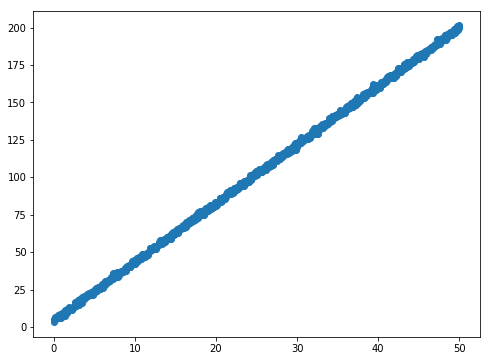

In [2]:
N = 1000

x = np.linspace(0,50,N)

y = 4.53314 + 3.9131*x + np.random.randn(N)
#y = 3.1415926 + 4.1415926*np.sqrt(x)+ 4.1472832*np.exp(-0.01431*(x-10)**2)+ np.random.randn(N)

plt.figure(figsize = (8,6))
plt.scatter(x,y)

In [3]:
temp = Regression()

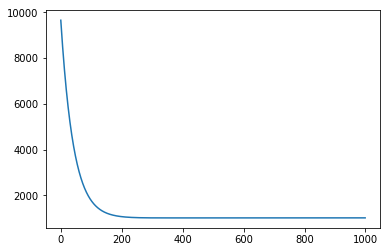

In [4]:
temp.Fit(x,y,eta=1e-4 ,epochs= int(1e3) ,show_curve=True)

In [5]:
temp.R2()

0.9996810848227299

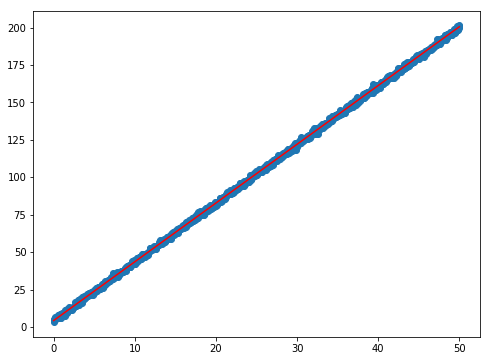

In [6]:
plt.figure(figsize = (8,6))
plt.scatter(x,y)
plt.plot(x,temp.y_hat,color = "RED")

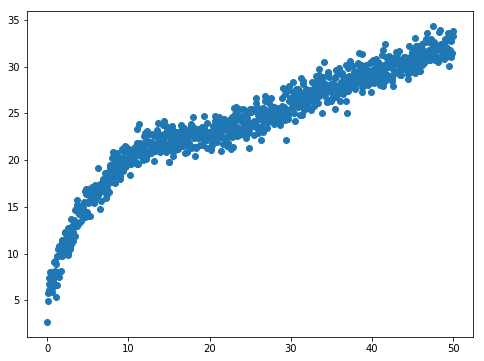

In [7]:
N = 1000

x = np.linspace(0,50,N)

y = 3.1415926 + 4.1415926*np.sqrt(x)+ 4.1472832*np.exp(-0.01431*(x-10)**2)+ np.random.randn(N)

plt.figure(figsize = (8,6))
plt.scatter(x,y)

In [8]:
temp2 = Regression()

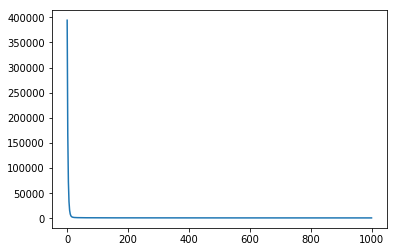

In [9]:
temp2.Fit_GRB(x,y,eta=1e-4 ,epochs= int(1e3) ,show_curve=True)

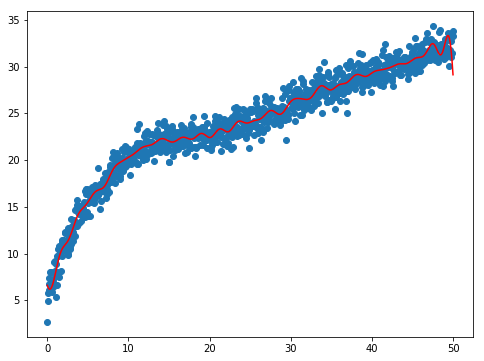

In [10]:
plt.figure(figsize = (8,6))
plt.scatter(x,y)
plt.plot(x,temp2.y_hat,color = "RED")

In [11]:
N = 200
D = 2

x = np.random.randn(N,D)
x0 = np.array([[1]*N]).T
X = np.column_stack((x0, x))

x[:10,:]

w_true = np.array([4.2,7.1,3.6])
y = X.dot(w_true) + np.random.randn(N)

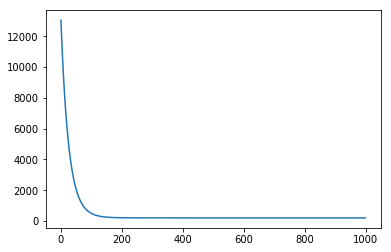

In [12]:
temp3 = Regression()
temp3.Fit(x,y,eta=1e-4 ,epochs= int(1e3) ,show_curve=True)

In [13]:
temp3.R2()

0.9854524051897193

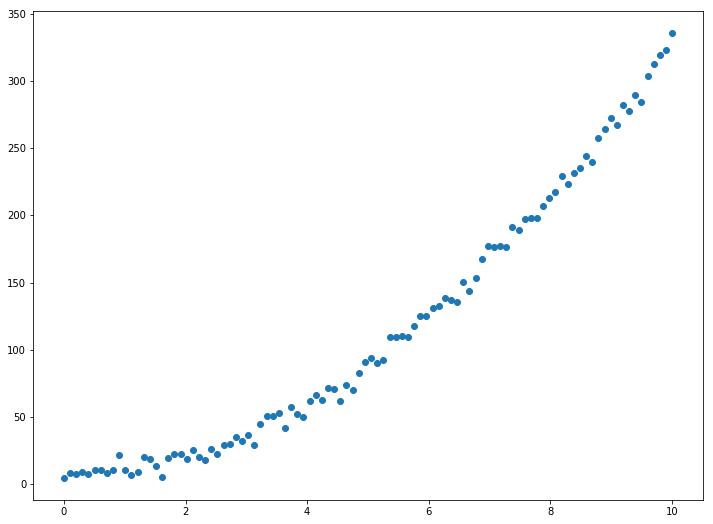

In [14]:
x = np.linspace(0,10,100)

y = 4.9 + 1.2 *x + 3.11456*(x**2) + np.random.randn(100)*6

plt.figure(figsize=(12,9))
plt.scatter(x,y)

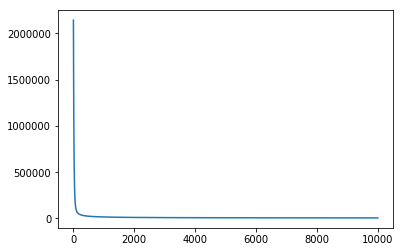

In [15]:
temp4 = Regression()
temp4.Fit_GRB(x,y,eta=1e-4 ,epochs= int(1e4) ,show_curve=True)

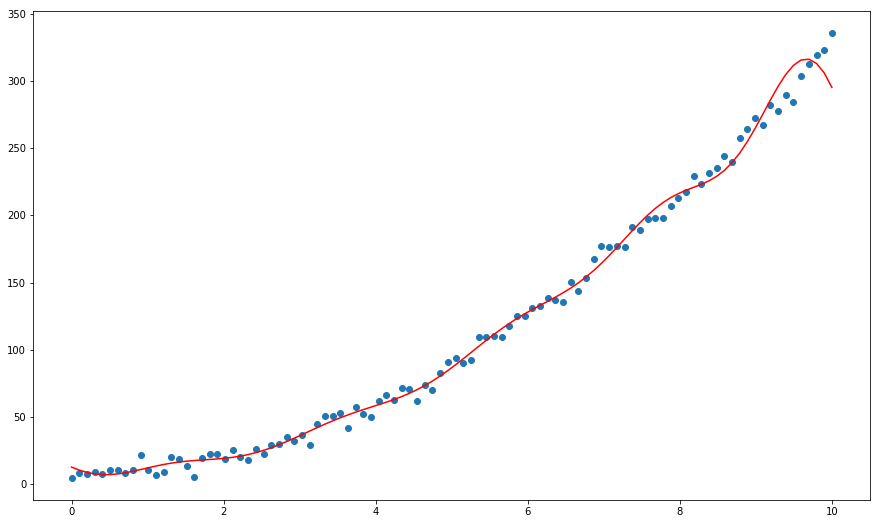

In [16]:
plt.figure(figsize=(15,9))
plt.scatter(x,y)
plt.plot(x,temp4.y_hat, color = "red")

In [17]:
df = pd.read_csv('./fuel_economy.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [18]:
y =  df['hwy']
x = df[['displ','cyl','cty']]


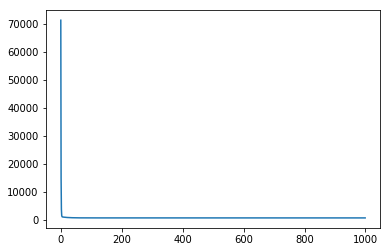

In [19]:
temp5 = Regression()
temp5.Fit(x,y,eta=1e-5 ,epochs= int(1e3) ,batch_sz = 2,show_curve=True)

In [20]:
temp5.R2()

0.9139020336250205

R-Squared 0.9146454946109973


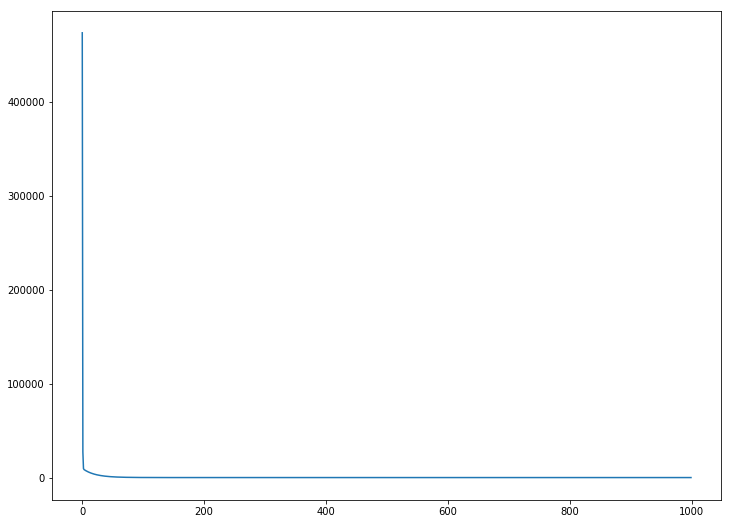

In [21]:
X = np.vstack([np.array([1]*(x.shape[0])), x.T]).T
w = np.random.randn(X.shape[1])
# J is of OLS
J=[]
eta = 1e-5
epochs = 1000

for i in range ( epochs):
    y_hat = X.dot(w)
    J.append(OLS(y,y_hat))
    w -= eta*X.T.dot(y_hat - y)

print ("R-Squared {}".format(R2(y,y_hat)))
plt.figure(figsize= (12,9))
plt.plot(J)

In [22]:
dummies = pd.get_dummies(df)
dummies.drop('hwy',axis='columns',inplace=True)
dummies.head()

,displ,year,cyl,cty,manufacturer_audi,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_honda,manufacturer_hyundai,...,fl_e,fl_p,fl_r,class_2seater,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
0,1.8,1999,4,18,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1.8,1999,4,21,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2.0,2008,4,20,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,2.0,2008,4,21,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,2.8,1999,6,16,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [23]:
y =  df.hwy
x = dummies

In [24]:
x = (x - x.min()) / (x.max() - x.min())
X = np.vstack([np.array([1]*(x.shape[0])), x.T]).T


R-Squared 0.9740009493515627


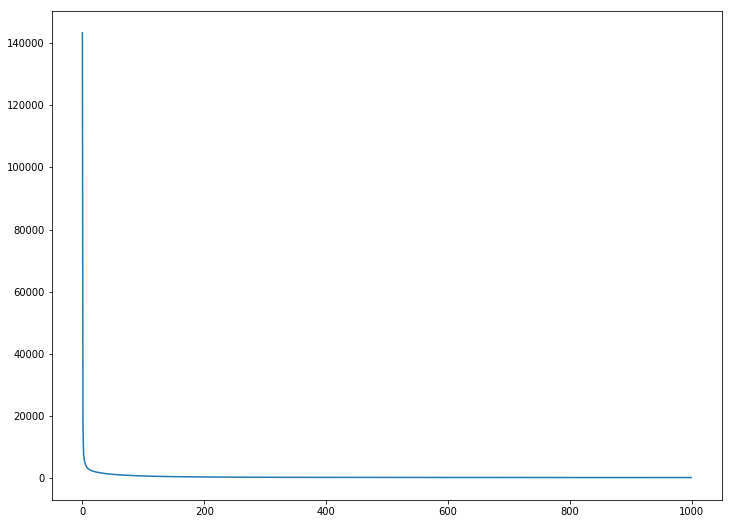

In [25]:
w = np.random.randn(X.shape[1])
# J is of OLS
J=[]
eta = 1e-3
epochs = 1000

for i in range ( epochs):
    y_hat = X.dot(w)
    J.append(OLS(y,y_hat))
    w -= eta*X.T.dot(y_hat - y)
    
print ("R-Squared {}".format(R2(y,y_hat)))
plt.figure(figsize= (12,9))
plt.plot(J)

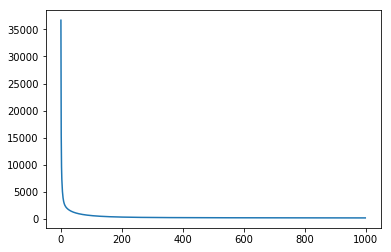

In [26]:
temp6 = Regression()
temp6.Fit(x,y,eta=1e-3 ,epochs= int(1e3) ,batch_sz = 2,show_curve=True)

In [27]:
temp6.R2()

0.9749789004209826

In [28]:
N = 500
D = 3
K = 2


# Simulate the Data

X = np.random.randn(N,D)
PHI = np.column_stack(( X, X[:,0]**2, X[:,1]**2, X[:,2]**2))

W_true = np.random.randn(PHI.shape[1],2)

Y = PHI.dot(W_true) + np.random.randn(N,K)

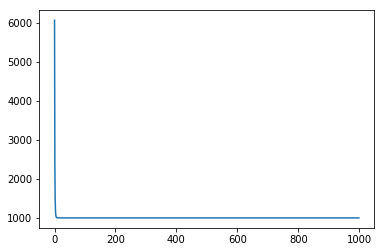

In [29]:
temp7 = Regression()
temp7.Fit2(PHI,Y,eta=1e-3 ,epochs= int(1e3) ,batch_sz = 2,show_curve=True)

In [30]:
temp7.R2()

0.954983119840576

In [31]:
R2_M(Y,temp7.y_hat)

array([0.96413913, 0.94046119])